In [1]:
import tensorflow as tf
import numpy as np
from functools import partial
from matplotlib import pyplot as plt
%matplotlib inline
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# a)
denseLayer = partial(tf.keras.layers.Dense, activation="elu", kernel_initializer="he_normal")
eluLayers = [denseLayer(100) for _ in range(20)]

In [4]:
# b)
cifar10 = tf.keras.datasets.cifar10.load_data()
cifar10

170500096/170498071 [==============================] - 27s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

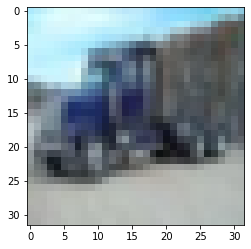

In [6]:
plt.imshow(x_train[np.random.randint(0, 50000)], interpolation='nearest')
plt.show()

In [84]:
x_train.mean(axis=0)


array([[[130.71074, 136.05614, 132.5538 ],
        [130.14036, 135.44238, 131.85358],
        [131.05044, 136.24616, 132.58144],
        ...,
        [131.05902, 136.307  , 132.44078],
        [130.39308, 135.70848, 132.00036],
        [130.174  , 135.4736 , 131.89246]],

       [[130.0993 , 135.29484, 131.36412],
        [129.3446 , 134.45914, 130.4656 ],
        [130.2169 , 135.1767 , 131.10234],
        ...,
        [130.04254, 135.13862, 130.90018],
        [129.33038, 134.55898, 130.49918],
        [129.1568 , 134.38368, 130.45104]],

       [[129.72472, 134.64818, 130.2514 ],
        [128.71662, 133.49748, 129.01922],
        [129.47348, 134.05546, 129.47586],
        ...,
        [129.21066, 133.95824, 129.29398],
        [128.59094, 133.54152, 129.06528],
        [128.59134, 133.55772, 129.22356]],

       ...,

       [[126.55372, 125.9533 , 114.1421 ],
        [124.58844, 123.7335 , 111.77894],
        [123.92508, 122.8011 , 110.73544],
        ...,
        [124.24036, 123.00

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[32, 32, 3]), # setting input_shape to get model summary
    *eluLayers,
    tf.keras.layers.Dense(10, activation='softmax')
])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
opt = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_81 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_82 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_83 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_84 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_85 (Dense)             (None, 100)             

In [78]:
history = model.fit(x_train, y_train, epochs=100, 
                    #batch_size=128, 
                    callbacks=[callback],
                    verbose=1)

Epoch 1/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.9393 - accuracy: 0.0994
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3043 - accuracy: 0.0988
Epoch 3/100
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3044 - accuracy: 0.1007
Epoch 4/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3044 - accuracy: 0.0993
Epoch 5/100
1077/1563 [===================>..........] - ETA: 3s - loss: 2.3047 - accuracy: 0.0994

KeyboardInterrupt: 

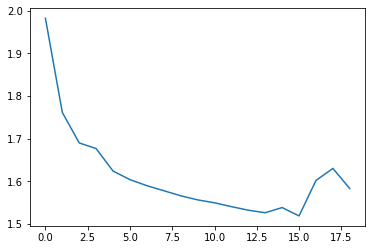

In [63]:
plt.plot(history.history['loss'])

In [72]:
# c)
# Specify model imperatively
batch_model = tf.keras.Sequential()
batch_model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    batch_model.add(tf.keras.layers.BatchNormalization())
    batch_model.add(denseLayer(100))
batch_model.add(tf.keras.layers.BatchNormalization())
batch_model.add(tf.keras.layers.Dense(10, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
opt = tf.keras.optimizers.Nadam(learning_rate=0.01)
batch_model.compile(optimizer=opt, 
                    loss='sparse_categorical_crossentropy',
                    metrics=["accuracy"])

In [68]:
batch_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 3072)              12288     
_________________________________________________________________
dense_130 (Dense)            (None, 100)               307300    
_________________________________________________________________
batch_normalization_21 (Batc (None, 100)               400       
_________________________________________________________________
dense_131 (Dense)            (None, 100)               10100     
_________________________________________________________________
batch_normalization_22 (Batc (None, 100)               400       
_________________________________________________________________
dense_132 (Dense)            (None, 100)             

In [69]:
batch_history = batch_model.fit(x_train, y_train, epochs=100, 
                    batch_size=128, callbacks=[callback],
                    verbose=1)

Epoch 1/100
391/391 [==============================] - 7s 17ms/step - loss: 1.8162
Epoch 2/100
391/391 [==============================] - 7s 17ms/step - loss: 1.5669
Epoch 3/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4696
Epoch 4/100
391/391 [==============================] - 7s 17ms/step - loss: 1.3996
Epoch 5/100
391/391 [==============================] - 7s 17ms/step - loss: 1.3421
Epoch 6/100
391/391 [==============================] - 6s 16ms/step - loss: 1.2970
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 1.2575
Epoch 8/100
391/391 [==============================] - 6s 16ms/step - loss: 1.2239
Epoch 9/100
391/391 [==============================] - 7s 17ms/step - loss: 1.1861
Epoch 10/100
391/391 [==============================] - 6s 17ms/step - loss: 1.1551
Epoch 11/100
391/391 [==============================] - 6s 17ms/step - loss: 1.1262
Epoch 12/100
391/391 [==============================] - 7s 17ms/step - loss: 1.1005
E

KeyboardInterrupt: 

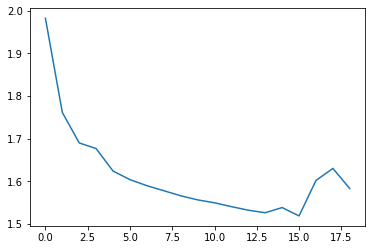

In [70]:
plt.plot(history.history['loss'])

In [71]:
plt.plot(batch_history.history['loss'])

NameError: name 'batch_history' is not defined

In [ ]:
# d - replace BatchNorm with SELU
selu_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[32, 32, 3]), # setting input_shape to get model summary
    *[tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")]
    tf.keras.layers.Dense(10, activation='softmax')
3])

## Key learnings

- For early stopping, you need to gauge the loss on a _validation_ set
- Next time, follow training on Tensorboard
- For scaling inputs, try doing it manually with Numpy, it's a good exercise to get more fingerspitzgefuhl for numpy
- Create model checkpoints while training (keras.callbacks.ModelCheckpoint

See https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb for examples